# Potato Detaction and annotation Project Training Steps

This is step by step hwo we train our custom data on YOLO11s model for our Computer Vision Project  We use Google Colab To train the model


In [ ]:
# check the cuda gpu
!nvidia-smi

Mon Apr 28 20:47:49 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 1. Load the dataset

the folder called `data.zip` has our labeled image using label studio we labeled our data and export it for YOLO standard 

In [ ]:
# unzip the dataset on the folder called custom_data
!unzip -q /content/data.zip -d /content/custom_data

## 1.1 split the dataset intu training and validation

In [ ]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py


!python train_val_split.py --datapath="/content/custom_data" --train_pct=0.9

--2025-04-28 20:48:03--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-04-28 20:48:03 (46.4 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Created folder at /content/data/train/images.
Created folder at /content/data/train/labels.
Created folder at /content/data/validation/images.
Created folder at /content/data/validation/labels.
Number of image files: 368
Number of annotation files: 368
Images moving to train: 331
Images moving to validation: 37


## 2 Training the model

to train the model we first install the framework that base for YOLO called ultralytics

In [ ]:
# install YOLO package
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 58.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

## 2.2 create yaml file to configure the YOLO model

yaml file configure the model to train the data. it tell everything about the data position for the model

In [ ]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

 
  data = {
      'path': '/content/data',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return


path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data
train: train/images
val: validation/images
nc: 4
names:
- Damaged Potato
- Defected Potato
- Potato
- Sprouted Potato


In [ ]:
# Train the YOLO11 model on the dataset
!yolo detect train data=/content/data.yaml model=yolo11s.pt epochs=60 imgsz=640

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 18.4M/18.4M [00:00<00:00, 445MB/s]
Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou

In [ ]:
# test the model on the validation dataset
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.119 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/37 /content/data/validation/images/095d9e20-B-112-_JPG.rf.fa1a1a594a4ad22787b6913e5ef02c8a.jpg: 640x640 1 Defected Potato, 15.6ms
image 2/37 /content/data/validation/images/1354e534-37_jpg.rf.83d5666cc7f0aafb094cd1371ae26334.jpg: 640x640 1 Potato, 15.7ms
image 3/37 /content/data/validation/images/150150d6-B-584-_JPG.rf.59b122466fe57d2d9018e8cfe8a362c3.jpg: 640x640 1 Defected Potato, 20.0ms
image 4/37 /content/data/validation/images/15b3e8cf-6435266_jpg.rf.86ad5c64a37711bd40bc2367f09a9605.jpg: 640x640 2 Potatos, 15.6ms
image 5/37 /content/data/validation/images/179b0726-179_100_jpg.rf.fa9a1220a14123c50874147dc324de44.jpg: 640x640 1 Potato, 15.6ms
image 6/37 /content/data/validation/images/1a87dc89-B-28-_JPG.rf.e0bdf32f695ae095fd33be9fddd44fd7.jpg: 640x640 1 Damaged Potato, 15.6ms
image 7/37 /content/data/validatio

## 3 Visualize the model

to see the model output we can visualize some of output from the data

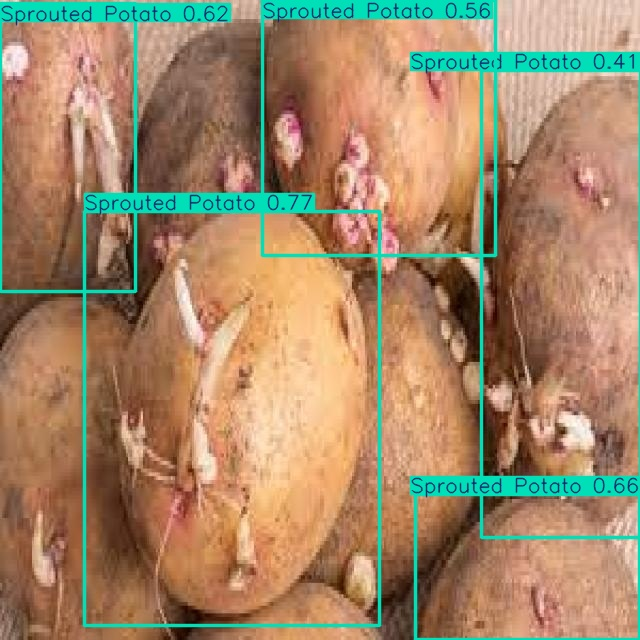

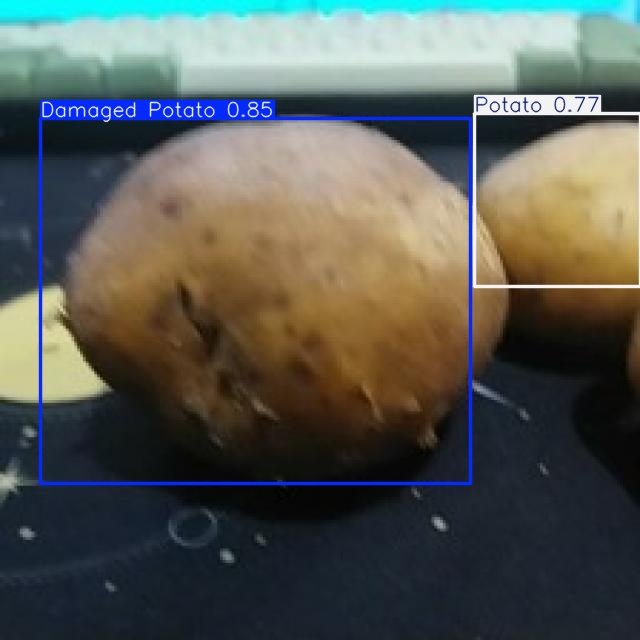

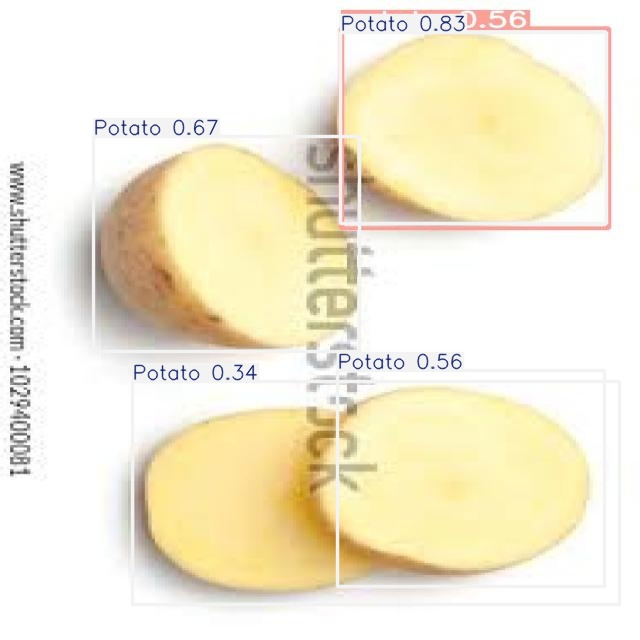

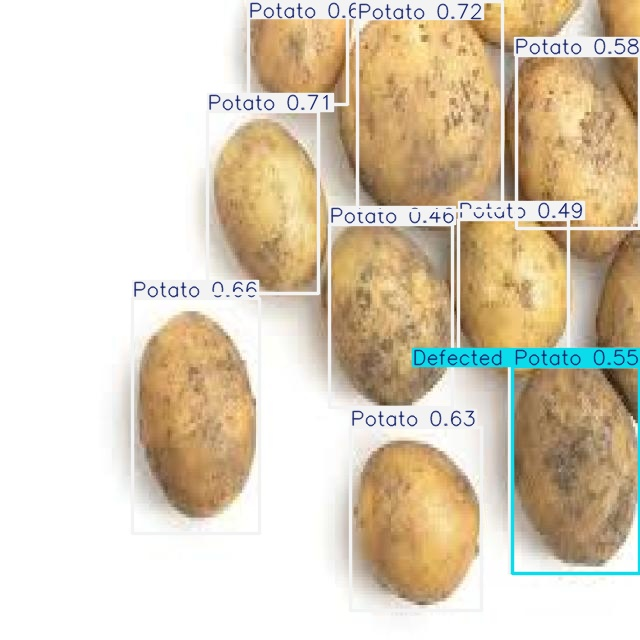

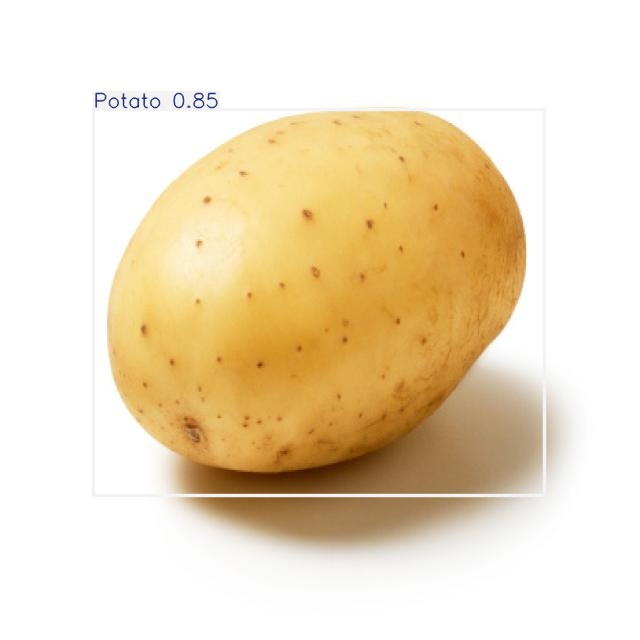

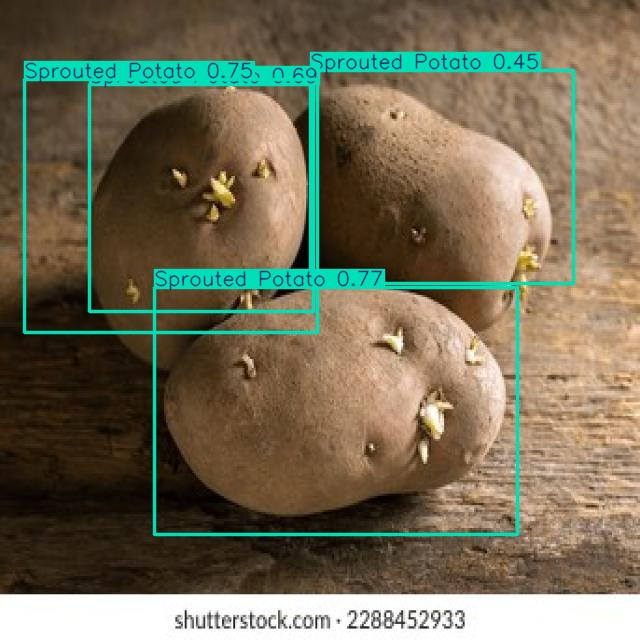

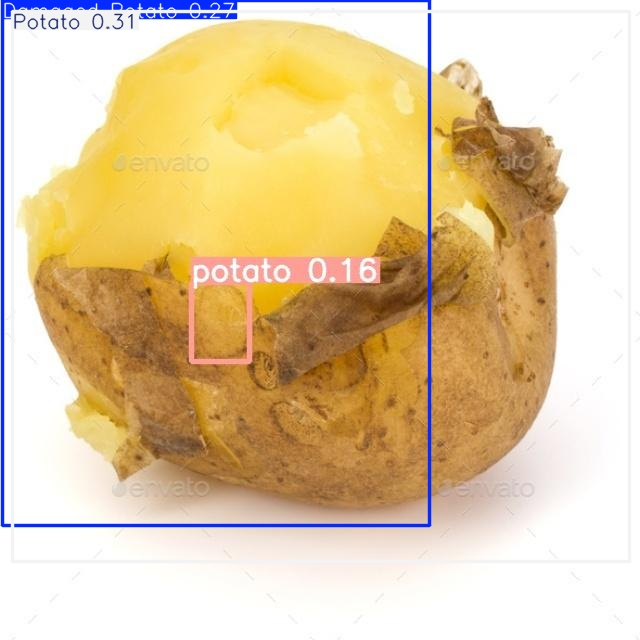

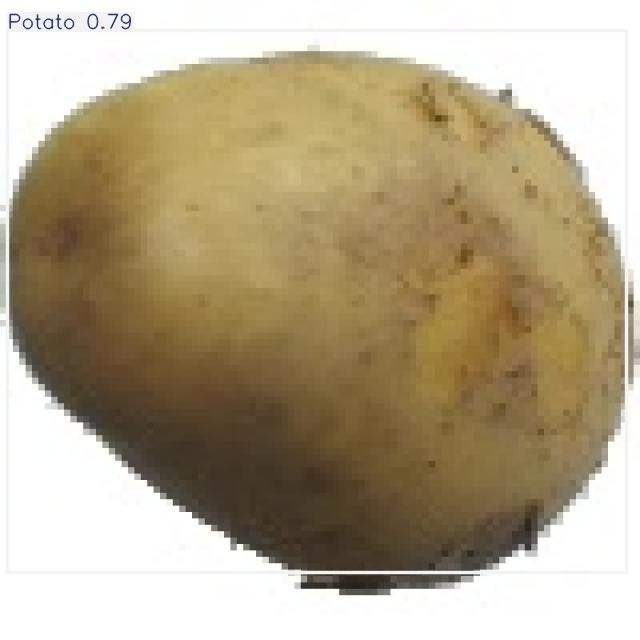

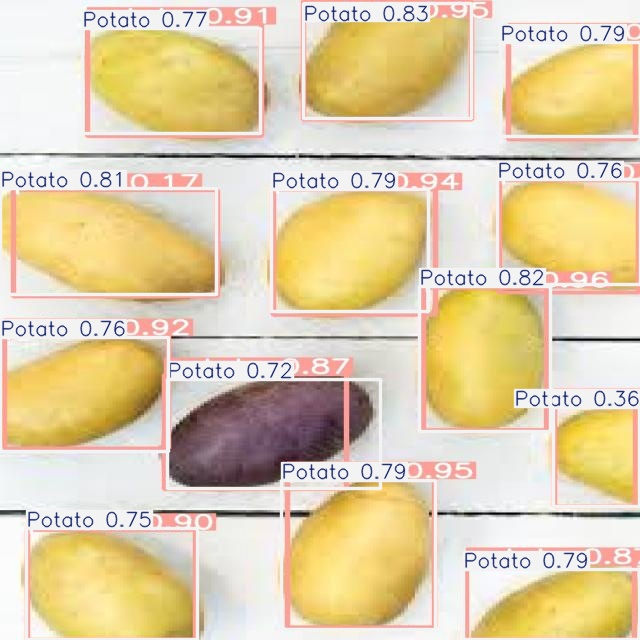

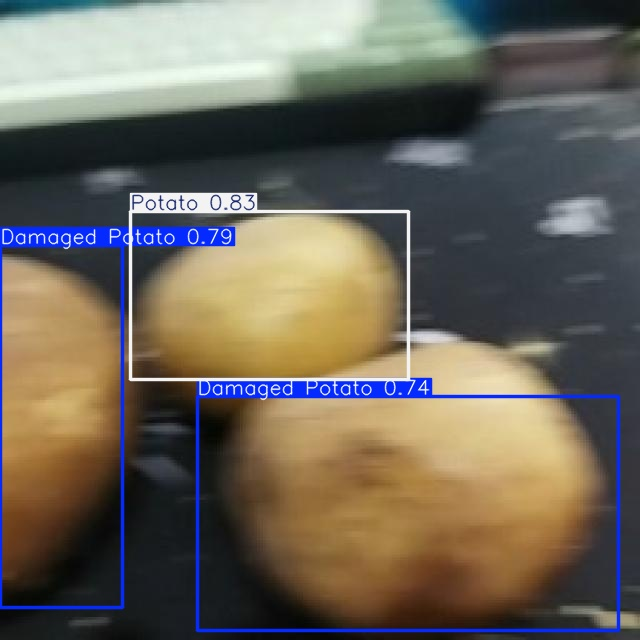

In [ ]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


## 4 Saving the model

to do the Infrance we have to save the model and its weight and then we can do in our local computer 

In [ ]:
# Create "my_model" folder to store model weights and train results
!mkdir /content/my_model
!cp /content/runs/detect/train/weights/best.pt /content/my_model/my_model.pt
!cp -r /content/runs/detect/train /content/my_model

# Zip into "my_model.zip"
%cd my_model
!zip /content/my_model.zip my_model.pt
!zip -r /content/my_model.zip train
%cd /content

/content/my_model
  adding: my_model.pt (deflated 8%)
  adding: train/ (stored 0%)
  adding: train/F1_curve.png (deflated 9%)
  adding: train/results.csv (deflated 60%)
  adding: train/train_batch0.jpg (deflated 6%)
  adding: train/val_batch1_pred.jpg (deflated 20%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/last.pt (deflated 8%)
  adding: train/weights/best.pt (deflated 8%)
  adding: train/confusion_matrix_normalized.png (deflated 23%)
  adding: train/train_batch2.jpg (deflated 4%)
  adding: train/PR_curve.png (deflated 14%)
  adding: train/train_batch1052.jpg (deflated 8%)
  adding: train/val_batch1_labels.jpg (deflated 20%)
  adding: train/R_curve.png (deflated 11%)
  adding: train/train_batch1.jpg (deflated 4%)
  adding: train/P_curve.png (deflated 9%)
  adding: train/confusion_matrix.png (deflated 27%)
  adding: train/train_batch1051.jpg (deflated 11%)
  adding: train/val_batch0_pred.jpg (deflated 11%)
  adding: train/labels_correlogram.jpg (deflated 41%)
  addin